---
title: "Exploratory Data Exploration"
format:
  html:
      embed-resources: true
      code-fold: true
---

## Data Exploration

### Monthly Ridership

Now that the monthly ridership data from 2018-2023 is cleaned for both WMATA and BART datasets, exploratory data analysis (EDA) can be performed. An important aspect of this data to reiterate is that WMATA's dataset contains average daily public transit entries for each month, while BART's dataset simply has a single sample from one day of public transit entries from the 18th day of each month. Therefore, comparison of these trends rely on the assumption that the samples for BART are representative of the month's average. Nonetheless, viewing these trends alongside each other can provide great insight into the differentiation between cities of the recent phenomena regarding public transit usage.

To accomplish this, we will first combine these datasets into a single dataframe and obtain summary statistics. In this case, along with many below, summary statistics are obtained using the `pandas` software tool in Python, which allows for data manipulation and analysis.

In [2]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt
import pandas as pd

# Apply the default theme
sns.set_theme(style="whitegrid", palette="pastel")

# Load an example dataset
bart_monthly = pd.read_csv('../data/cleaned_data/bart_monthly_ridership.csv')
wmata_monthly = pd.read_csv('../data/cleaned_data/wmata_monthly_ridership.csv')
combined_ridership = bart_monthly.merge(wmata_monthly, on='date')
combined_ridership = combined_ridership.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
combined_ridership = combined_ridership.rename(columns={'daily_entries': 'bart_ridership', 'avg_daily_entries': 'wmata_ridership'})
combined_ridership[['bart_ridership','wmata_ridership']].describe()
#combined_ridership.head()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,bart_ridership,wmata_ridership
count,69.000000,69.000000
mean,218181.318841,290734.623188
std,153902.308664,176660.259728
min,25141.000000,30017.000000
25%,92401.000000,140034.000000
50%,149296.000000,237880.000000
75%,407339.000000,472304.000000
max,432971.000000,568265.000000


There is not much to glean from these statistics prior to visualization, as the numbers can be difficult to comprehend without context. However, we can see that WMATA ridership seems to exceed that of BART consistently. More information can be acquired by plotting the time series of ridership.

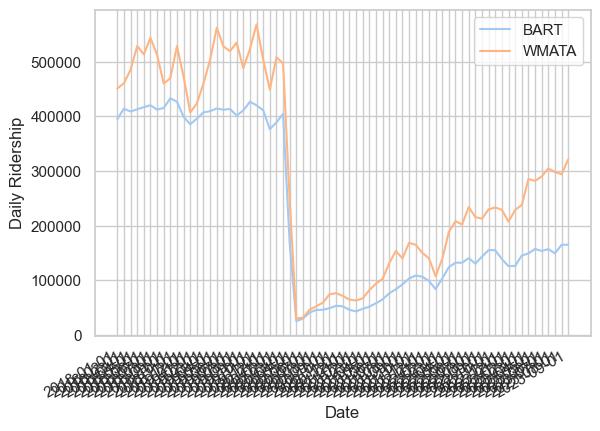

In [33]:
plt.plot(combined_ridership['date'], combined_ridership['bart_ridership'], label ='BART')
plt.plot(combined_ridership['date'], combined_ridership['wmata_ridership'], label ='WMATA')
plt.xlabel("Date")
plt.ylabel("Daily Ridership")
plt.tick_params(bottom=False)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

This graph, and many others below, use the `matplotlib` software tool in Python, which offers a suite of graphical visualizations to assist us with data understanding.

By looking at this time series graph, there are a few key observations to acknowledge. The first is that both systems appeared to be somewhat equally affected by the significant drop in March of 2020, as we'd expect. Additionally, it is clear that prior to this drop, WMATA consistently had more riders each month, a difference that all but disappeared when the pandemic hit. A crucial development to consider is that over the period of recovery, WMATA has regained riders at a faster rate, now matching--or possible exceeding--the gap that had previously been present. Evaluating why these recoveries seem to diverge will be an integral part of future analysis. Finally, it is notable that both trends appear to have not yet reached a plateau, indicating that there may be further increases in ridership to come.

We can establish a hypothesis based on this stating that WMATA and BART ridership follows the same trend over the given period of time.

In [44]:
combined_ridership.corr(method='pearson',numeric_only=True)

,bart_ridership,wmata_ridership
bart_ridership,1.000000,0.976802
wmata_ridership,0.976802,1.000000


Lastly, we can use Pearson correlation analysis to see the correlation between trends of each public transit system. This gives us a value of $0.9768$, which indicates that from 2018-2023, WMATA and BART ridership are significantly positively correlated.

### Work-from-Home Trends

In [4]:
wfh_monthly = pd.read_csv('../data/cleaned_data/WFH_city_cleaned.csv')
wfh_monthly = wfh_monthly.drop(columns='Unnamed: 0')
wfh_monthly[['wfh_BayArea','wfh_WashingtonDC']].describe()

,wfh_BayArea,wfh_WashingtonDC
count,35.000000,35.000000
mean,38.928571,36.657143
std,4.243789,4.792107
min,32.300000,30.000000
25%,36.050000,32.850000
50%,39.300000,37.900000
75%,41.500000,39.500000
max,54.200000,54.800000


The first notable piece of information about this data is that it begins in October of 2020, which is well after the pandemic's effects began taking shape. However, the first data point represents data up to and including the information reached on that date, so it is sensible to think of it as an aggregate for the early pandemic. Thus, we should keep in mind that it may be an outlier, as it contains data from a greater date range, from a time that we might assume would have a greater work-from-home rate. The summary statistics above tell us little about the trends, but we can see that work-from-home in Washington, D.C. and the San Francisco Bay Area are quite similar at first glance.

Text(0, 0.5, 'WFH Percentage')

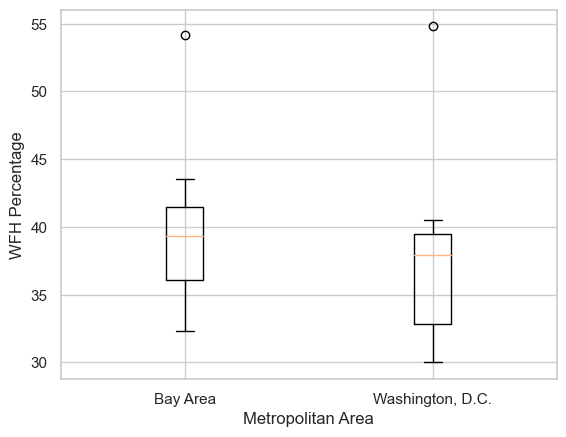

In [53]:
from matplotlib.pyplot import boxplot, xlabel, ylabel
boxplot(wfh_monthly[['wfh_BayArea','wfh_WashingtonDC']], labels=['Bay Area','Washington, D.C.'])
plt.xlabel('Metropolitan Area')
plt.ylabel('WFH Percentage')

The boxplot above uses the `matplotlib` tool in Python to visualize descriptive data side-by-side. This confirms the suspicion that there is indeed one outlier point, which is the first observation for each dataset. In further analysis, it will be important to deal with this.

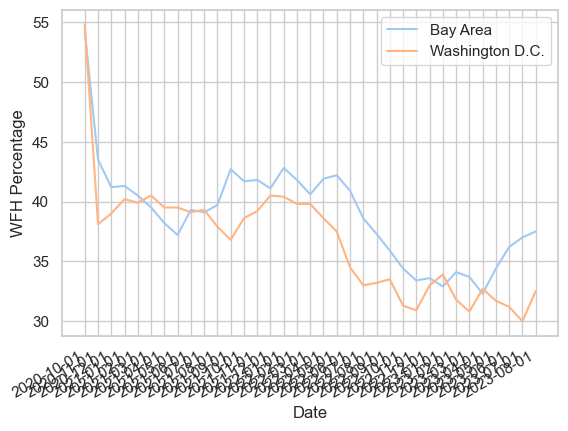

In [27]:
#p1 = wfh_monthly.plot()

plt.plot(wfh_monthly['date'], wfh_monthly['wfh_BayArea'], label ='Bay Area')
plt.plot(wfh_monthly['date'], wfh_monthly['wfh_WashingtonDC'], label ='Washington D.C.')
plt.xlabel("Date")
plt.ylabel("WFH Percentage")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

This line graph also uses `matplotlib` and shows time series data on how work-from-home percentages have evolved over the course of the pandemic recovery. In both metropolitan areas, we see a steady decline in work-from-home reported, which suggests a general trend of people returning to the office, thus potentially needing public transit. While the differences between these lines are difficult to discern, it does appear that the San Francisco Bay Area's recent data exceeds that of Washington, D.C., indicating that their residents have retained work-from-home status at a greater rate.

Next, we will merge this data with the public transit ridership data to conduct correlation analyses and gain insights on the extent of the impact that work-from-home has on ridership.

                  bart_ridership  wmata_ridership  wfh_BayArea   
bart_ridership          1.000000         0.963119    -0.593388  \
wmata_ridership         0.963119         1.000000    -0.645030   
wfh_BayArea            -0.593388        -0.645030     1.000000   
wfh_WashingtonDC       -0.756827        -0.790434     0.869830   

                  wfh_WashingtonDC  
bart_ridership           -0.756827  
wmata_ridership          -0.790434  
wfh_BayArea               0.869830  
wfh_WashingtonDC          1.000000  


<Axes: >

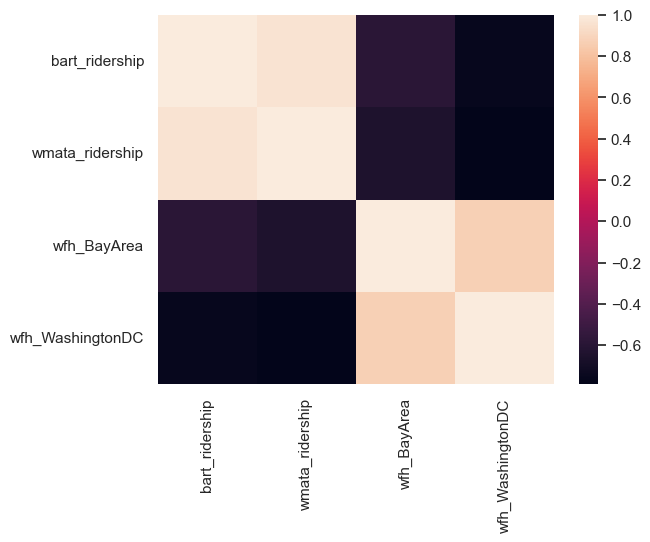

In [6]:
wfh_ridership = combined_ridership[33:67].merge(wfh_monthly, on='date')
wfh_ridership.head()
print(wfh_ridership.corr(method='pearson',numeric_only=True))
sns.heatmap(wfh_ridership.corr(numeric_only=True))

The above correlation heatmap uses the `seaborn` tool in Python, which provides advanced data visualizations for enhanced exploratory analysis. Using this visualization, along with the associated valuesm, we can see that work-from-home rates are heavily positively correlated between cities. This confirms the observation made previously. In addition, work-from-home has a strong negative correlation with public transit ridership for both metropolitan areas. That is, as fewer people work from home, more people use public transit. This is also expected and will serve as a great refined hypothesis for future analysis.

### Work-from-Home Desires

In evaluating the future of work-from-home, as well as the social impact it has, it is important to perform EDA on the work-from-home desires of both workers and employers. The summary statistics below show a reality that is expected: workers want more work-from-home days than employers, and both want fewer work-from-home days for workers who are able to work on-site.

In [7]:
wfh_desires = pd.read_csv('../data/cleaned_data/WFH_surveys_cleaned.csv')
wfh_desires = wfh_desires.drop(columns='Unnamed: 0')
wfh_desires[['employer_desires_all','employer_desires_able','worker_desires_all','worker_desires_able']].describe()

,employer_desires_all,employer_desires_able,worker_desires_all,worker_desires_able
count,38.000000,37.000000,38.000000,37.000000
mean,1.359211,2.045405,2.270526,2.807568
std,0.188628,0.278932,0.087763,0.096650
min,1.050000,1.560000,2.100000,2.550000
25%,1.177500,1.800000,2.190000,2.770000
50%,1.400000,2.210000,2.275000,2.810000
75%,1.530000,2.260000,2.320000,2.870000
max,1.610000,2.370000,2.470000,2.970000


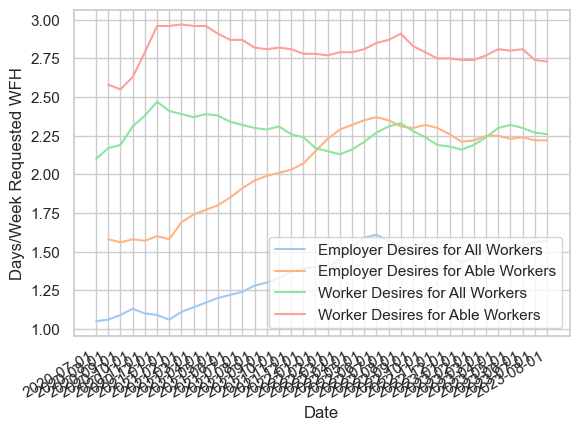

In [36]:
#p2 = wfh_desires.plot()
plt.plot(wfh_desires['date'], wfh_desires['employer_desires_all'], label='Employer Desires for All Workers')
plt.plot(wfh_desires['date'], wfh_desires['employer_desires_able'], label='Employer Desires for Able Workers')
plt.plot(wfh_desires['date'], wfh_desires['worker_desires_all'], label='Worker Desires for All Workers')
plt.plot(wfh_desires['date'], wfh_desires['worker_desires_able'], label='Worker Desires for Able Workers')
plt.xlabel("Date")
plt.ylabel("Days/Week Requested WFH")
#p2.xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

Using this `matplotlib`-generated plot, we can see time series data for the four categories. The observations noted above remain true, but there is a clear trend that should be pointed out regarding employer desires. While workers seem to have generally maintained the same expected number of work-from-home days, employers have increased their appetite for more work-from-home days. Further analysis should examine causes for this phenomenon, which could be caused by realizations that work-from-home has merit in some cases, a changing political climate, simply conceding ground to their counterparts, or perhaps an undiscovered reason.

Thus, our hypotheses regarding this data set are:
1. Workers desire more work-from-home days/week than employers
2. Work-from-home desires have remained the same over time

### Hourly Public Transit Entries

By performing EDA on hourly public transit usage, we can see how the purpose of public transit ridership has changed since the impacts of the pandemic. It is reasonable to surmise that peaks around "rush hour" are generally related to work commutes, so analyzing the extent of those peaks can provide insight in what the general populus seeks from public transportation. To accomplish this, we can combine the pre-COVID and post-COVID datasets for WMATA hourly ridership. Since we are not interested in comparing total ridership (that was already covered), the first visualization will be a line graph using `matplotlib`.

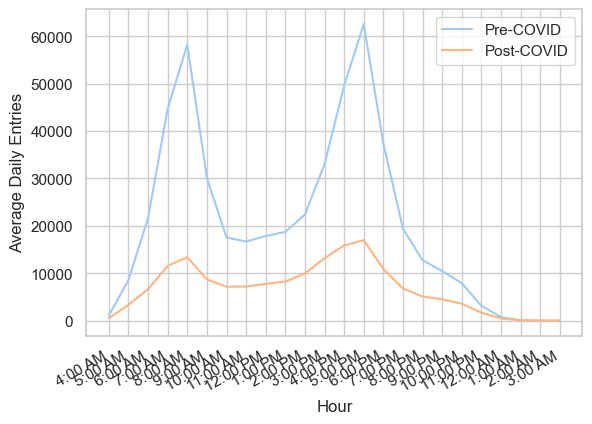

In [57]:
hourly_pre = pd.read_csv('../data/cleaned_data/hourly_average_cleaned_pre-covid.csv')
hourly_post = pd.read_csv('../data/cleaned_data/hourly_average_cleaned_post-covid.csv')
combined_hourly = hourly_pre.merge(hourly_post, on='hour')
combined_hourly = combined_hourly.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','hour_numeric_x','hour_numeric_y','avg_daily_exits_x','avg_daily_exits_y'])
combined_hourly = combined_hourly.rename(columns={'avg_daily_entries_x': 'entries_pre_covid', 'avg_daily_entries_y': 'entries_post_covid'})
plt.plot(combined_hourly['hour'], combined_hourly['entries_pre_covid'], label = "Pre-COVID")
plt.plot(combined_hourly['hour'], combined_hourly['entries_post_covid'], label = "Post-COVID")
plt.xlabel("Hour")
plt.ylabel("Average Daily Entries")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


This graph clearly shows rush hour peaks for both datasets, although it is noteworthy that the peaks appear less pronounced in the post-COVID dataset. This could indicate that commutes to work represented a smaller proportion of total transit ridership after the pandemic hit, which would make intuitive sense. To gain more information, it could be insightful to plot the ratio of entries by hour below.

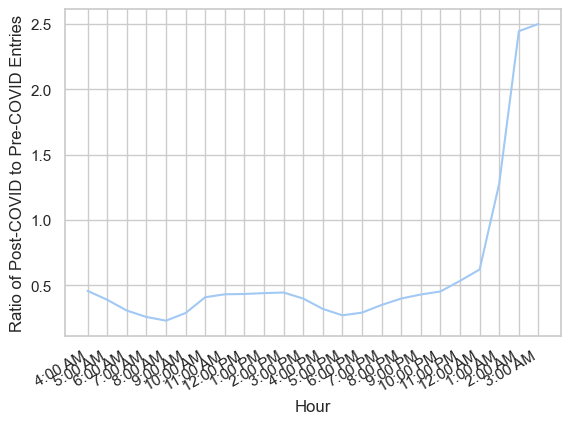

In [54]:
hourly_ratio = combined_hourly['entries_post_covid']/combined_hourly['entries_pre_covid']
plt.plot(combined_hourly['hour'], hourly_ratio)
plt.xlabel("Hour")
plt.ylabel("Ratio of Post-COVID to Pre-COVID Entries")
plt.gcf().autofmt_xdate()
plt.show()

This visualization has a few notable features. The first is that the ratio of post-COVID entries to pre-COVID entries does seem to lower around the rush hour times, suggesting that rush hour did have a less pronounced effect later on. Secondly, we can see anomalies in the early-morning hours, where the ratio actually exceeds 1. Due to the relatively small sample of data in these hours, it is fair to call these outliers, as they do not represent overall trends in the data. This presumption is confirmed in the boxplot below.

{'whiskers': [<matplotlib.lines.Line2D at 0x137ce07d0>,
 'caps': [<matplotlib.lines.Line2D at 0x137ce1b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x137cd3c50>],
 'medians': [<matplotlib.lines.Line2D at 0x137ce3350>],
 'fliers': [<matplotlib.lines.Line2D at 0x137ce1150>],
 'means': []}

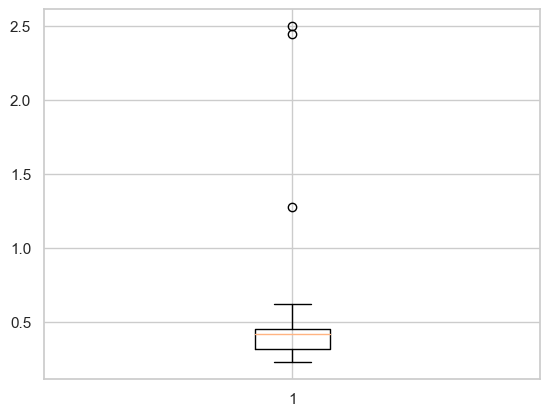

In [58]:
boxplot(hourly_ratio)

Based on this EDA, our updated hypothesis regarding this data is that the COVID-19 pandemic had an effect on the distribution of hourly WMATA ridership.

### Public Transportation Type

This data can provide valuable insight on which forms of public transportation have been most affected. Based on what we can conclude here, there may be indications that some methods should be studied with more emphasis. The summary statistics for this data offer a simple understanding of ridership volume and which methods are used most. However, the bulk of our EDA will focus on correlation between variables to evaluate how these methods' ridership change alongside one another.

In [ ]:
ridership_type = pd.read_csv('../data/cleaned_data/ridership_by_quarter_cleaned.csv')
ridership_type = ridership_type.drop(columns='Unnamed: 0')
ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].describe()

,total_ridership,heavy_rail,light_rail,commuter_rail,trolleybus,bus,demand_response,other
count,5.300000e+01,5.300000e+01,53.000000,53.000000,53.000000,5.300000e+01,53.000000,53.000000
mean,2.279058e+06,8.269957e+05,113075.698113,104419.962264,19331.075472,1.125994e+06,47151.716981,42090.377358
std,5.826479e+05,2.299050e+05,30778.435641,32376.278023,5935.076336,2.695039e+05,10558.336191,11875.951653
min,6.209250e+05,1.222490e+05,33137.000000,13521.000000,3395.000000,4.205780e+05,16907.000000,11140.000000
25%,2.361673e+06,8.339910e+05,112616.000000,109741.000000,19598.000000,1.133805e+06,46331.000000,40588.000000
50%,2.538958e+06,9.270570e+05,125865.000000,119043.000000,21395.000000,1.234299e+06,51334.000000,45071.000000
75%,2.624985e+06,9.682590e+05,133233.000000,125486.000000,23740.000000,1.312650e+06,53673.000000,49803.000000
max,2.729424e+06,1.015234e+06,140828.000000,130970.000000,25051.000000,1.364993e+06,59535.000000,57254.000000


/Users/joshsweren/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


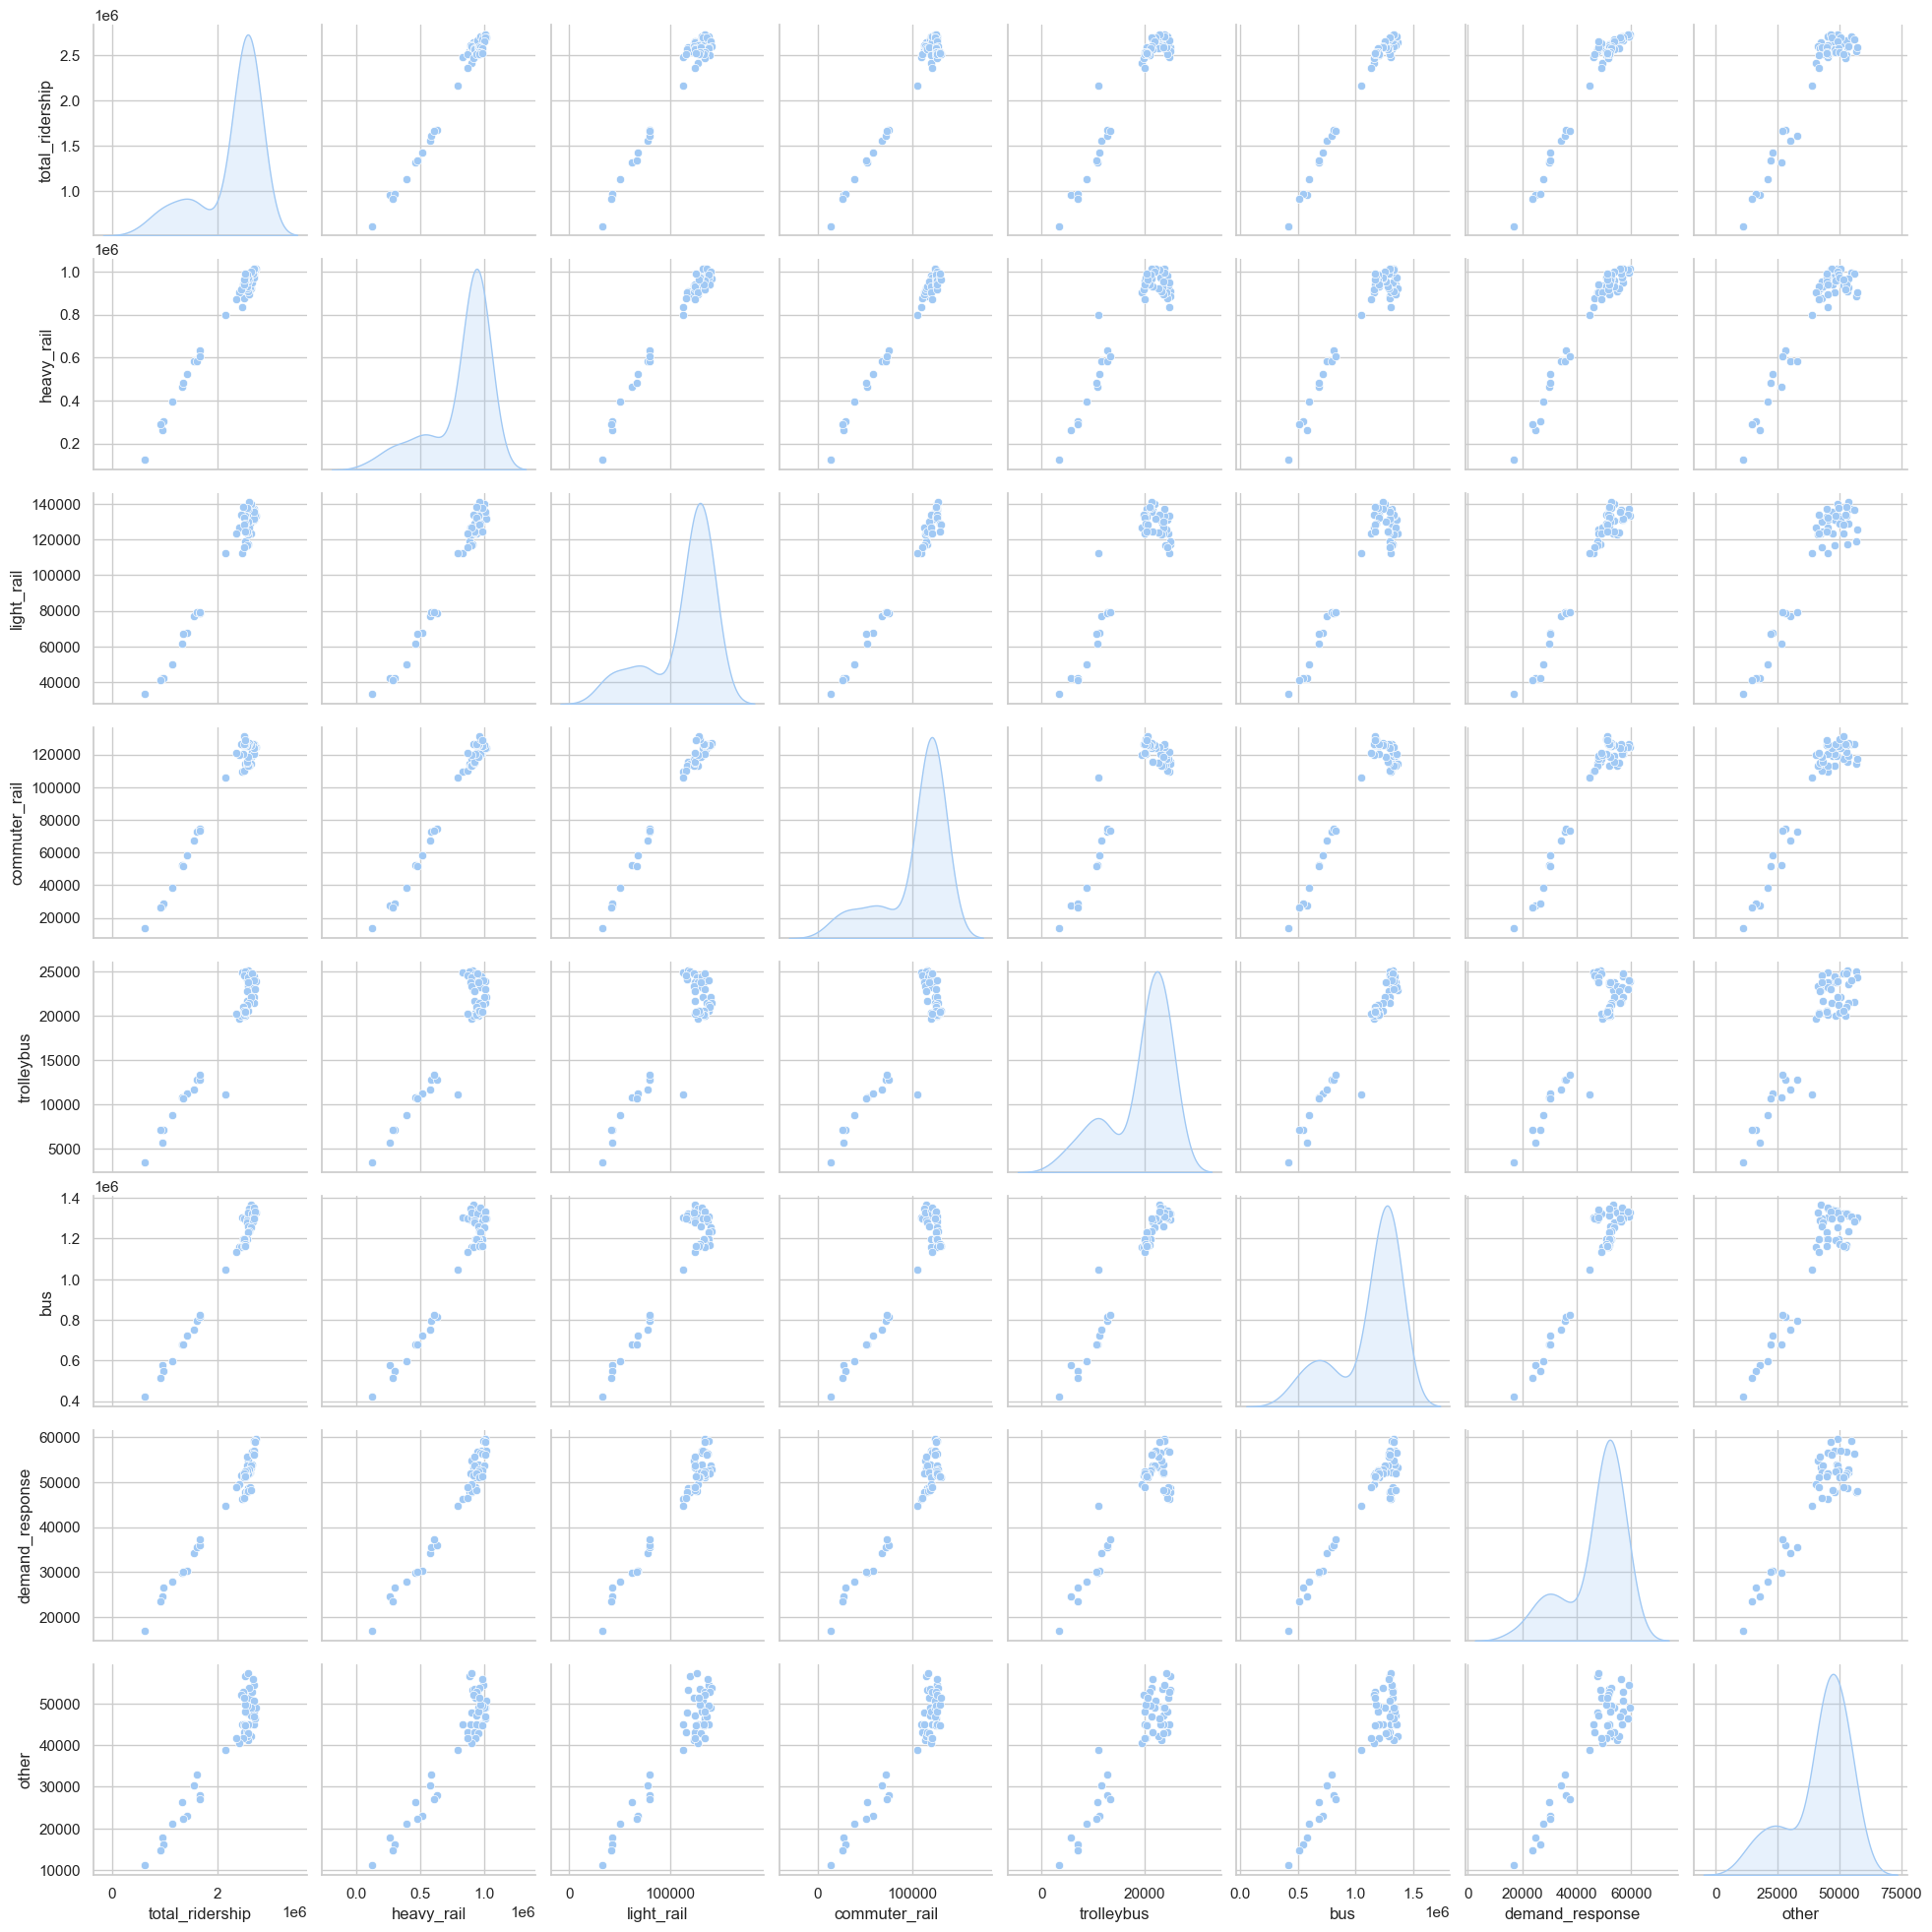

In [ ]:
sns.pairplot(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']], diag_kind='kde', kind="scatter")

----------------------
PEARSON CORRELATION MATRIX:
----------------------
                 total_ridership  heavy_rail  light_rail  commuter_rail   
total_ridership         1.000000    0.989721    0.978829       0.979993  \
heavy_rail              0.989721    1.000000    0.987208       0.991768   
light_rail              0.978829    0.987208    1.000000       0.990598   
commuter_rail           0.979993    0.991768    0.990598       1.000000   
trolleybus              0.959039    0.923241    0.901781       0.906034   
bus                     0.987325    0.955084    0.941736       0.940388   
demand_response         0.975021    0.976711    0.971167       0.960878   
other                   0.941060    0.932013    0.933872       0.939074   

                 trolleybus       bus  demand_response     other  
total_ridership    0.959039  0.987325         0.975021  0.941060  
heavy_rail         0.923241  0.955084         0.976711  0.932013  
light_rail         0.901781  0.941736         0.9

<Axes: >

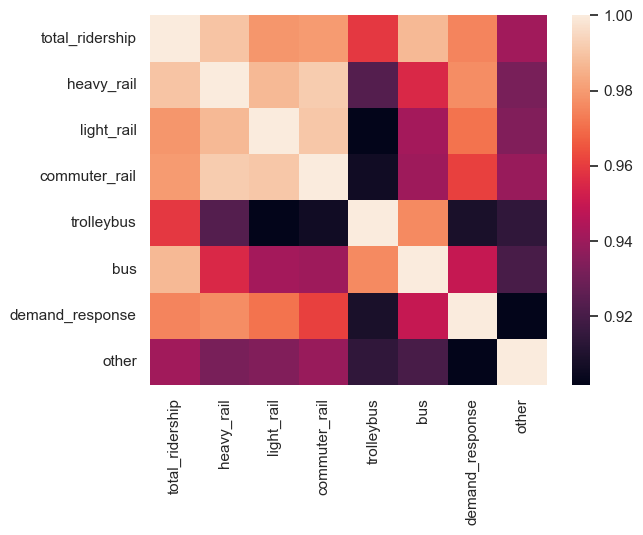

In [ ]:
print(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].corr(method='pearson',numeric_only=True))
sns.heatmap(ridership_type[['total_ridership','heavy_rail','light_rail','commuter_rail','trolleybus','bus','demand_response','other']].corr(numeric_only=True))

By using the `seaborn` package, we can obtain a pairplot, a correlation matrix, and a heatmap to visualize correlation between the ridership of different modes of public transportation. From this, we can see that no Pearson correlation fails to exceed 0.9, indicating strong correlation between all variables. Thus, our refined hypothesis is that all methods of public transportation are impacted equally by the decline and/or resurgence of public transit usage.